## Dominik Adamczyk
### Mownit Lab1 rozwiązania

### Zadanie 
- Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.dot">LinearAlgebra.dot</a>) i mnożenia macierzy kwadratowej przez wektor z użyciem 
<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Elementary-operations-1">operatora *</a>.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. 
- Proszę poukładac wykresy  w tabelkę za pomocą  opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.

In [2]:
using LinearAlgebra, CSV, DataFrames

function my_dot(x, y)
    return dot(x, y)
end

function my_multiplication(x, y)
    return x * y
end


my_multiplication (generic function with 1 method)

In [3]:
v1 = [1, 2, 3]
v2 = [4, 5, 6]
my_dot(v1, v2)

32

In [4]:
m1 = [1 2; 3 4]
m2 = [1 1; 2 2]
my_multiplication(m1, m2)

2×2 Matrix{Int64}:
  5   5
 11  11

In [5]:
println(rand(Float64, (3, 3)))
println(rand(5))

[0.07002376717762082 0.5614563130023154 0.7628371354148878; 0.35247907580359095 0.35213970361813784 0.46899269070910266; 0.8448063292674891 0.9149237254979515 0.16700678328787333]


[0.11928621157580066, 0.9908934008691783, 0.010405375879338208, 0.23696954996619257, 0.050136227629655195]


In [14]:
# Kod zawarty w tym bloku został wykonany dwa razy, aby wyeliminować
# dłuższy czas wykonania go spowodowany kompilacją Julii.
frame = DataFrame(Size=Int[], Scalar_Time=Float64[], Matrix_Time=Float64[])
lengths = [x for x in 500:500:20000]

for i in 1:10
    for length in lengths
        
        vec1 = rand(length)
        vec2 = rand(length)
        mat1 = rand(Float64, (length, length))
        dot_time = @elapsed my_dot(vec1, vec2)
        mult_time = @elapsed my_multiplication(mat1, vec2)
        push!(frame,(length, dot_time, mult_time))
    end
end

CSV.write("times.csv", frame)
frame


Row,Size,Scalar_Time,Matrix_Time
,Int64,Float64,Float64
1,500,9.6e-6,0.0001416
2,1000,1.08e-5,0.0010193
3,1500,9.3e-6,0.0010301
4,2000,8.8e-6,0.0058924
5,2500,1.09e-5,0.0014957
6,3000,3.8e-5,0.0022205
7,3500,1.01e-5,0.0029204
8,4000,1.12e-5,0.0042555
9,4500,1.12e-5,0.0062133


In [29]:
using Statistics
my_data = CSV.read("times.csv", delim=",", DataFrame)

stats = combine(groupby(my_data, :Size), "Scalar_Time" => mean, "Scalar_Time" => std, "Matrix_Time" => mean, "Matrix_Time" => std)

Row,Size,Scalar_Time_mean,Scalar_Time_std,Matrix_Time_mean,Matrix_Time_std
,Int64,Float64,Float64,Float64,Float64
1,500,5.3e-6,1.61383e-6,0.0002213,0.000108348
2,1000,5.12e-6,2.76156e-6,0.00041297,0.000217232
3,1500,8.06e-6,4.81345e-6,0.00069784,0.000179862
4,2000,1.014e-5,5.05288e-6,0.00148131,0.00156176
5,2500,8.86e-6,9.64019e-7,0.00143699,0.000358468
6,3000,1.21e-5,9.1281e-6,0.00189697,0.000406748
7,3500,1.0e-5,8.09664e-7,0.00315396,0.000791824
8,4000,1.311e-5,3.83766e-6,0.00368877,0.000716812
9,4500,1.153e-5,1.4553e-6,0.00446075,0.000889229


In [30]:
describe(my_data)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Size,10250.0,500,10250.0,20000,0,Int64
2,Scalar_Time,0.000124886,2.1e-6,4.395e-5,0.0004832,0,Float64
3,Matrix_Time,0.0294851,0.0001163,0.0224865,0.104444,0,Float64


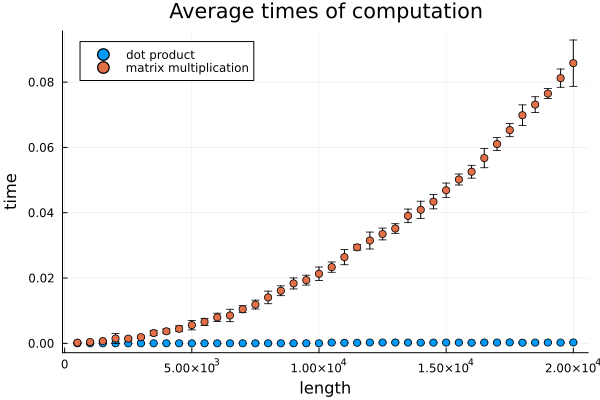

In [47]:
using Plots
scatter(stats.Size, [stats.Scalar_Time_mean stats.Matrix_Time_mean],
        label=["dot product" "matrix multiplication"],
        yerr=[stats.Scalar_Time_std stats.Matrix_Time_std])
title!("Average times of computation")
xlabel!("length")
ylabel!("time")

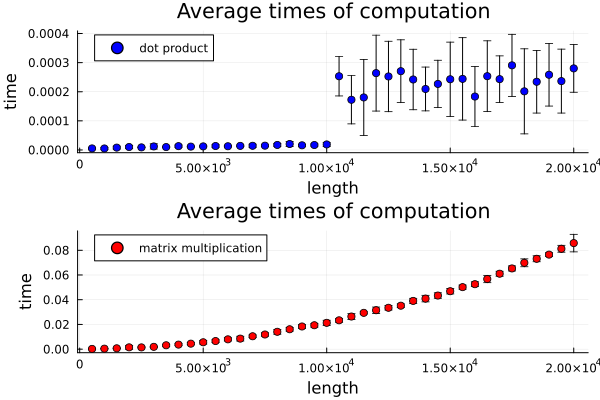

In [72]:
using Plots
scatter(stats.Size, [stats.Scalar_Time_mean stats.Matrix_Time_mean],
        label=["dot product" "matrix multiplication"],
        yerr=[stats.Scalar_Time_std stats.Matrix_Time_std],
        layout = (2,1),
        color = [:blue :red],
        title = "Average times of computation",
        xlab = "length",
        ylab = "time",
    )

In [86]:
less_stats = filter(:Size => s -> s <= 10000, stats)

Row,Size,Scalar_Time_mean,Scalar_Time_std,Matrix_Time_mean,Matrix_Time_std
,Int64,Float64,Float64,Float64,Float64
1,500,5.3e-6,1.61383e-6,0.0002213,0.000108348
2,1000,5.12e-6,2.76156e-6,0.00041297,0.000217232
3,1500,8.06e-6,4.81345e-6,0.00069784,0.000179862
4,2000,1.014e-5,5.05288e-6,0.00148131,0.00156176
5,2500,8.86e-6,9.64019e-7,0.00143699,0.000358468
6,3000,1.21e-5,9.1281e-6,0.00189697,0.000406748
7,3500,1.0e-5,8.09664e-7,0.00315396,0.000791824
8,4000,1.311e-5,3.83766e-6,0.00368877,0.000716812
9,4500,1.153e-5,1.4553e-6,0.00446075,0.000889229


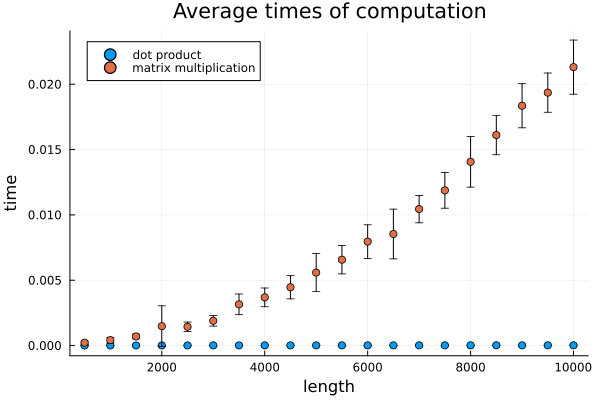

In [87]:
using Plots
scatter(less_stats.Size, [less_stats.Scalar_Time_mean less_stats.Matrix_Time_mean],
        label=["dot product" "matrix multiplication"],
        yerr=[less_stats.Scalar_Time_std less_stats.Matrix_Time_std])
title!("Average times of computation")
xlabel!("length")
ylabel!("time")

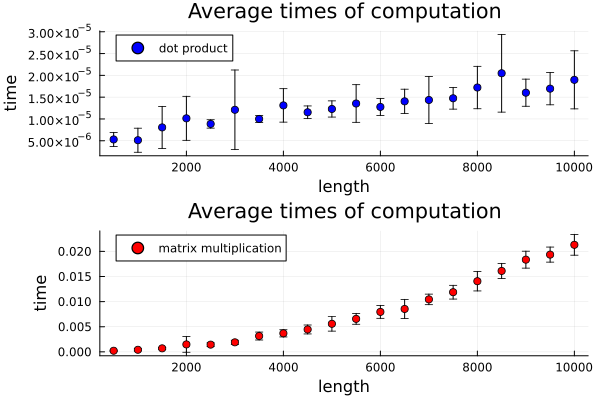

In [88]:
using Plots
scatter(less_stats.Size, [less_stats.Scalar_Time_mean less_stats.Matrix_Time_mean],
        label=["dot product" "matrix multiplication"],
        yerr=[less_stats.Scalar_Time_std less_stats.Matrix_Time_std],
        layout = (2,1),
        color = [:blue :red],
        title = "Average times of computation",
        xlab = "length",
        ylab = "time",
    )